<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/Gold_forecasting_using_FB_PROPHET_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [113]:
gold_df= pd.read_csv("/content/gold_monthly_csv.csv")
gold_df


,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [114]:
gold_df.dtypes

Date      object
Price    float64
dtype: object

In [117]:
gold_df

,Date,Price
0,1950-01-01,34.730
1,1950-02-01,34.730
2,1950-03-01,34.730
3,1950-04-01,34.730
4,1950-05-01,34.730
...,...,...
842,2020-03-01,1593.764
843,2020-04-01,1680.030
844,2020-05-01,1715.697
845,2020-06-01,1734.032


In [116]:
gold_df["Date"] = gold_df["Date"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m"))

In [62]:
gold_df["Year"] = pd.to_datetime(gold_df ["Date"]).apply(lambda x : x.year)
gold_df["Month"] = pd.to_datetime(gold_df ["Date"]).apply(lambda x : x.month)
gold_df["Day"] = pd.to_datetime(gold_df ["Date"]).apply(lambda x : x.day)


In [66]:
gold_df["ds"]= pd.DatetimeIndex( gold_df["Year"] + gold_df["Month"]  +gold_df["Day"])

In [67]:
gold_df

,Date,Price,Year,Month,Day,ds
0,1950-01-01,34.730,1950,1,1,1970-01-01 00:00:00.000001952
1,1950-02-01,34.730,1950,2,1,1970-01-01 00:00:00.000001953
2,1950-03-01,34.730,1950,3,1,1970-01-01 00:00:00.000001954
3,1950-04-01,34.730,1950,4,1,1970-01-01 00:00:00.000001955
4,1950-05-01,34.730,1950,5,1,1970-01-01 00:00:00.000001956
...,...,...,...,...,...,...
842,2020-03-01,1593.764,2020,3,1,1970-01-01 00:00:00.000002024
843,2020-04-01,1680.030,2020,4,1,1970-01-01 00:00:00.000002025
844,2020-05-01,1715.697,2020,5,1,1970-01-01 00:00:00.000002026
845,2020-06-01,1734.032,2020,6,1,1970-01-01 00:00:00.000002027


In [68]:
gold_df.dtypes

Date     datetime64[ns]
Price           float64
Year              int64
Month             int64
Day               int64
ds       datetime64[ns]
dtype: object

In [118]:
gold_df.columns

Index(['Date', 'Price'], dtype='object')

In [70]:
gold_df=gold_df[['Date', 'Price', #'Year', 'Month', 'Day', #'ds'
  ]].copy()

In [119]:
df=gold_df.rename(columns = {'Date'	: 'ds'  , "Price" : "y"})
df

,ds,y
0,1950-01-01,34.730
1,1950-02-01,34.730
2,1950-03-01,34.730
3,1950-04-01,34.730
4,1950-05-01,34.730
...,...,...
842,2020-03-01,1593.764
843,2020-04-01,1680.030
844,2020-05-01,1715.697
845,2020-06-01,1734.032


In [120]:
last = df[len(df)-20:]
last

,ds,y
827,2018-12-01,1249.887
828,2019-01-01,1291.630
829,2019-02-01,1319.755
830,2019-03-01,1302.286
831,2019-04-01,1287.650
832,2019-05-01,1282.460
833,2019-06-01,1358.488
834,2019-07-01,1414.611
835,2019-08-01,1497.102
836,2019-09-01,1510.336


In [121]:
train = df[:-20]
train

,ds,y
0,1950-01-01,34.730
1,1950-02-01,34.730
2,1950-03-01,34.730
3,1950-04-01,34.730
4,1950-05-01,34.730
...,...,...
822,2018-07-01,1238.064
823,2018-08-01,1201.859
824,2018-09-01,1199.198
825,2018-10-01,1214.726


In [122]:
import pandas as pd
from prophet import Prophet


In [123]:
m = Prophet(daily_seasonality= True)
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_ezy93k/h5xz11tj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_ezy93k/b83udt6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37063', 'data', 'file=/tmp/tmpp_ezy93k/h5xz11tj.json', 'init=/tmp/tmpp_ezy93k/b83udt6p.json', 'output', 'file=/tmp/tmpp_ezy93k/prophet_model523f3v83/prophet_model-20230816125049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [124]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1187,2019-10-28
1188,2019-10-29
1189,2019-10-30
1190,2019-10-31
1191,2019-11-01


In [125]:
forecast = m.predict(future)
forecast
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,32.850641,-153.441192,185.874852,32.850641,32.850641,-12.444361,-12.444361,-12.444361,-7.053652,-7.053652,-7.053652,-5.390709,-5.390709,-5.390709,0.0,0.0,0.0,20.406279
1,1950-02-01,32.987490,-146.536871,190.523191,32.987490,32.987490,-12.236741,-12.236741,-12.236741,-7.053652,-7.053652,-7.053652,-5.183088,-5.183088,-5.183088,0.0,0.0,0.0,20.750750
2,1950-03-01,33.111096,-170.221910,190.030893,33.111096,33.111096,-17.941807,-17.941807,-17.941807,-7.053652,-7.053652,-7.053652,-10.888154,-10.888154,-10.888154,0.0,0.0,0.0,15.169290
3,1950-04-01,33.247946,-163.555933,182.697462,33.247946,33.247946,-15.681977,-15.681977,-15.681977,-7.053652,-7.053652,-7.053652,-8.628325,-8.628325,-8.628325,0.0,0.0,0.0,17.565969
4,1950-05-01,33.380381,-144.713381,182.581468,33.380381,33.380381,-14.149164,-14.149164,-14.149164,-7.053652,-7.053652,-7.053652,-7.095512,-7.095512,-7.095512,0.0,0.0,0.0,19.231217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,2019-10-28,1654.030143,1410.093794,1766.749648,1653.252432,1654.833348,-66.827440,-66.827440,-66.827440,-7.053652,-7.053652,-7.053652,-59.773788,-59.773788,-59.773788,0.0,0.0,0.0,1587.202702
1188,2019-10-29,1654.221474,1409.972449,1765.763522,1653.428177,1655.026810,-58.830668,-58.830668,-58.830668,-7.053652,-7.053652,-7.053652,-51.777016,-51.777016,-51.777016,0.0,0.0,0.0,1595.390806
1189,2019-10-30,1654.412806,1442.912479,1778.790169,1653.611833,1655.220008,-48.763245,-48.763245,-48.763245,-7.053652,-7.053652,-7.053652,-41.709593,-41.709593,-41.709593,0.0,0.0,0.0,1605.649561
1190,2019-10-31,1654.604137,1450.155952,1792.204781,1653.794420,1655.421430,-36.835464,-36.835464,-36.835464,-7.053652,-7.053652,-7.053652,-29.781812,-29.781812,-29.781812,0.0,0.0,0.0,1617.768673


In [131]:
forecast =forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast

,ds,yhat,yhat_lower,yhat_upper
1187,2019-10-28,1587.202702,1410.093794,1766.749648
1188,2019-10-29,1595.390806,1409.972449,1765.763522
1189,2019-10-30,1605.649561,1442.912479,1778.790169
1190,2019-10-31,1617.768673,1450.155952,1792.204781
1191,2019-11-01,1631.478579,1454.449512,1797.750943


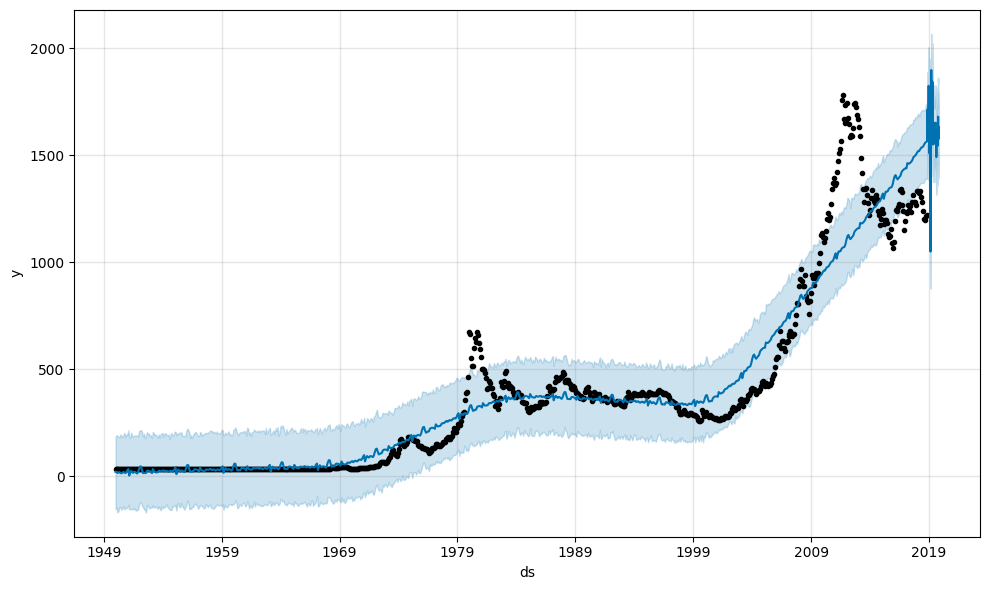

In [128]:
fig1 = m.plot(forecast)



In [ ]:
fig2 = m.plot_components(forecast)

In [127]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [129]:
forecast[forecast.ds == "2019-11-01" ]["yhat"]

1191    1631.478579
Name: yhat, dtype: float64

In [130]:
last[last.ds == "2019-11-01" ]["y"]

838    1471.921
Name: y, dtype: float64